In [55]:
import numpy as np

class dlnet:
    def __init__(self, x, y,lr=0.03):
        self.X=x
        self.Y=y
        self.Yh=np.zeros((1,1))
        
        self.n_layer=2 #number of layers
        self.dims = [3, 4, 1] #size of each layer 
        self.param = {} #used to store weights
        self.temp = {}  #used to store temp values
        self.grad = {}
        self.loss = []
        self.lr=lr
        self.sam = 1
        
    def nInit(self):    
        np.random.seed(1)
        self.param['W1'] = np.random.randn(self.dims[1], self.dims[0]) / np.sqrt(self.dims[0]) 
        self.param['b1'] = np.zeros((self.dims[1], 1))        
        self.param['W2'] = np.random.randn(self.dims[2], self.dims[1]) / np.sqrt(self.dims[1]) 
        self.param['b2'] = np.zeros((self.dims[2], 1))                
        return
    
    #Activation Functions
    def Sigmoid(self,Z):
        return 1/(1+np.exp(-Z))
    
    def Relu(self,Z):
        return np.maximum(0,Z)
    
    def Tanh(self,Z):
        return np.tanh(Z)
    
    #Feed Forward
    def forward(self):    
        Z1 = self.param['W1'].dot(self.X) + self.param['b1'] 
        A1 = self.Relu(Z1)
        self.temp['Z1']=Z1
        self.temp['A1']=A1
        
        Z2 = self.param['W2'].dot(A1) + self.param['b2']  
        A2 = self.Sigmoid(Z2)
        self.temp['Z2']=Z2
        self.temp['A2']=A2
        self.Yh=A2
        loss=self.nloss(A2)
        return self.Yh, loss
    
    #Cross Entropy Loss Function
    def nloss(self,Yh):
        loss = (1./self.sam) * (-np.dot(self.Y,np.log(Yh).T) - np.dot(1-self.Y, np.log(1-Yh).T))    
        return loss
    
    #Sum of Squared Error Loss Function
    def sseloss(self,Yh):
        squared_errors = (self.Yh - self.Y) ** 2
        loss = np.sum(squared_errors)
        return loss
    
    #Derivative of Activation Functions
    def dRelu(self,x):
        x[x<=0] = 0
        x[x>0] = 1
        return x
    
    def dSigmoid(self,Z):
        s = 1/(1+np.exp(-Z))
        dZ = s * (1-s)
        return dZ
    
    #Back propagation
    def backward(self):
        dLoss_Yh = - (np.divide(self.Y, self.Yh ) - np.divide(1 - self.Y, 1 - self.Yh))    
        
        dLoss_Z2 = dLoss_Yh * self.dSigmoid(self.temp['Z2'])    
        dLoss_A1 = np.dot(self.param["W2"].T,dLoss_Z2)
        dLoss_W2 = 1./self.temp['A1'].shape[1] * np.dot(dLoss_Z2,self.temp['A1'].T)
        dLoss_b2 = 1./self.temp['A1'].shape[1] * np.dot(dLoss_Z2, np.ones([dLoss_Z2.shape[1],1])) 
                            
        dLoss_Z1 = dLoss_A1 * self.dRelu(self.temp['Z1'])        
        dLoss_A0 = np.dot(self.param["W1"].T,dLoss_Z1)
        dLoss_W1 = 1./self.X.shape[1] * np.dot(dLoss_Z1,self.X.T)
        dLoss_b1 = 1./self.X.shape[1] * np.dot(dLoss_Z1, np.ones([dLoss_Z1.shape[1],1]))  
        
        self.param["W1"] = self.param["W1"] - self.lr * dLoss_W1
        self.param["b1"] = self.param["b1"] - self.lr * dLoss_b1
        self.param["W2"] = self.param["W2"] - self.lr * dLoss_W2
        self.param["b2"] = self.param["b2"] - self.lr * dLoss_b2
    
    #Gradient descent
    def gd(self,X, Y, iter = 3000,verbose=True):
        np.random.seed(1)                         
    
        self.nInit()
    
        for i in range(0, iter):
            Yh, loss=self.forward()
            self.backward()
        
            if i % 100 == 0:
                if verbose: 
                    print ("Loss value after iteration %i: %f" %(i, loss))
                self.loss.append(loss)
    
        return

In [56]:
X_train = np.array([[0,0,1],
                    [0,1,1],
                    [1,0,1]])
y_train = np.array([0,1,1])

X_test = np.array([[1,1,1]])
y_test = np.array([0])

print('Train :',X_train.shape,y_train.shape,'  Test :',X_test.shape,y_test.shape)

Train : (3, 3) (3,)   Test : (1, 3) (1,)


In [57]:
nn = dlnet(X_train,y_train)
nn.gd(X_train, y_train, iter = 2000)

Loss value after iteration 0: 2.279259
Loss value after iteration 100: 1.737041
Loss value after iteration 200: 1.535979
Loss value after iteration 300: 1.351606
Loss value after iteration 400: 0.936860
Loss value after iteration 500: 0.688975
Loss value after iteration 600: 0.526668
Loss value after iteration 700: 0.416669
Loss value after iteration 800: 0.338924
Loss value after iteration 900: 0.282875
Loss value after iteration 1000: 0.240540
Loss value after iteration 1100: 0.208436
Loss value after iteration 1200: 0.182976
Loss value after iteration 1300: 0.162651
Loss value after iteration 1400: 0.146031
Loss value after iteration 1500: 0.132287
Loss value after iteration 1600: 0.120761
Loss value after iteration 1700: 0.110975
Loss value after iteration 1800: 0.102575
Loss value after iteration 1900: 0.095239


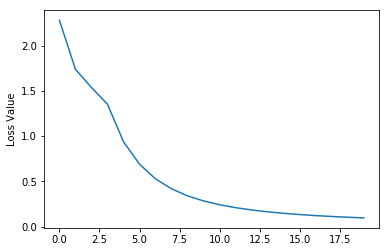

In [58]:
import matplotlib.pyplot as plt
plt.plot(nn.loss)
plt.ylabel('Loss Value')
plt.show()

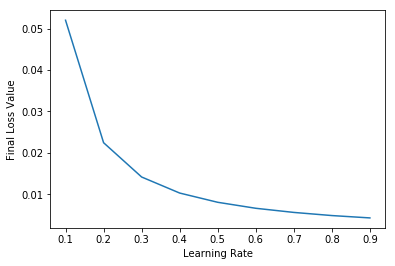

In [67]:
lr = []
loss = []

for i in range(1,10):
    lr.append(0.1*i)
    nnl = dlnet(X_train,y_train,lr=0.1*i)
    nnl.gd(X_train, y_train, iter = 1000,verbose=False)
    loss.append(nnl.loss[-1][0])
    
plt.plot(lr,loss)
plt.xlabel('Learning Rate')
plt.ylabel('Final Loss Value')
plt.show()